In [1]:
library(XML)

In [2]:
menURLs = 
  c("results/1999/cb99m.html", "results/2000/Cb003m.htm", "results/2001/oof_m.html",
    "results/2002/oofm.htm", "results/2003/CB03-M.HTM",
    "results/2004/men.htm", "results/2005/CB05-M.htm", 
    "results/2006/men.htm", "results/2007/men.htm", 
    "results/2008/men.htm", "results/2009/09cucb-M.htm",
    "results/2010/2010cucb10m-m.htm", 
    "results/2011/2011cucb10m-m.htm",
    "results/2012/2012cucb10m-m.htm")
ubase = "http://www.cherryblossom.org/"
urls = paste(ubase, menURLs, sep = "")

urls[1:3]
years = 1999:2012

[1] "http://www.cherryblossom.org/results/1999/cb99m.html"
[2] "http://www.cherryblossom.org/results/2000/Cb003m.htm"
[3] "http://www.cherryblossom.org/results/2001/oof_m.html"

In [3]:
extractResTable =
  #
  # Retrieve data from web site, 
  # find the preformatted text,
  # and write lines or return as a character vector.
  #
  function(url = "http://www.cherryblossom.org/results/2009/09cucb-F.htm",
           year = 1999, sex = "male", file = NULL)
  {
    doc = htmlParse(url)

    if (year == 2000) {

      # Get preformatted text from 4th font element
      # The top file is ill formed so the <pre> search doesn't work.
      ff = getNodeSet(doc, "//font")
      txt = xmlValue(ff[[4]])
      els = strsplit(txt, "\r\n")[[1]]
    }
    else if (year == 2009 & sex == "male") {
      # Get preformatted text from <div class="Section1"> element
      # Each line of results is in a <pre> element
      div1 = getNodeSet(doc, "//div[@class='Section1']")
      pres = getNodeSet(div1[[1]], "//pre")
      els = sapply(pres, xmlValue)
    }
    else if (year == 1999 & sex == "male") {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\n")[[1]]   
    } 
  
    
    else {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\r\n")[[1]]   
    } 
    
    if (is.null(file)) return(els)
    # Write the lines as a text file.
    writeLines(els, con = file)
  }



In [4]:
menTables = mapply(extractResTable, url = urls, year = years)
names(menTables) = years
sapply(menTables, length)



1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3193 3019 3627 3727 3951 4164 4335 5245 5283 5913 6659 6919 7019 7201

NULL

In [14]:
menTables$'2012'[-1:-8]

[1] "    1     1/347        9 Allan Kiprono          22 Kenya                  22:32   45:15  4:32 "
   [2] "    2     2/347       11 Lani Kiplagat          23 Kenya                  22:38   46:28  4:39 "
   [3] "    3     1/1093      31 John Korir             36 Kenya                  23:20   47:33  4:46 "
   [4] "    4     1/1457      15 Ian Burrell            27 Tucson AZ              23:50   47:34  4:46 "
   [5] "    5     3/347       19 Jesse Cherry           24 Blowing Rock NC        23:50   47:40  4:46 "
   [6] "    6     1/1490      37 Ketema Nugusse         31 Ethiopia               23:42   47:50  4:47 "
   [7] "    7     2/1457      13 Josh Moen              29 Minneapolis MN         24:06   48:38  4:52 "
   [8] "    8     3/1457      17 Patrick Rizzo          28 Boulder CO             24:24   49:14  4:56 "
   [9] "    9     4/1457      41 Stephen Hallinan       26 Washington DC          25:01   50:18  5:02 "
  [10] "   10     2/1490     345 Paolo Natali           31 Washington DC          25:20   50:44  5:05 "
  [11] "   11     3/1490     346 David McCollam         32 Bridgeport WV          25:33   50:56  5:06 "
  [12] "   12     4/347      299 Frank Devar            23 Washington DC          25:28   50:57  5:06 "
  [13] "   13     4/1490     112 Bert Rodriguez         32 Arlington VA           25:31   50:57  5:06 "
  [14] "   14     1/931      290 Chris Juarez           41 Alexandria VA          25:28   51:10  5:07 "
  [15] "   15     5/1457     108 Darryl Brown           29 Exton PA               25:28   51:16  5:08 "
  [16] "   16     6/1457     119 Jay Luna               28 Denver CO              25:22   51:17  5:08 "
  [17] "   17     7/1457     110 David Burnham          27 Arlington VA           25:27   51:23  5:09 "
  [18] "   18     8/1457     296 Karl Dusen             29 Rockville MD           25:51   51:27  5:09 "
  [19] "   19     9/1457     357 Brian Flynn            28 Bridgewater VA         25:34   51:29  5:09 "
  [20] "   20    10/1457     114 Carlos Renjifo         29 Columbia MD            25:51   51:43  5:11 "
  [21] "   21     5/1490     358 Dustin Meeker          30 Baltimore MD           25:51   51:53  5:12 "
  [22] "   22    11/1457     107 Christopher Sloane     28 Rockville MD           25:32   51:57  5:12 "
  [23] "   23    12/1457     116 Patrick Reaves         27 Durham NC              25:51   52:16  5:14 "
  [24] "   24     6/1490     111 Jake Klim              31 North Bethesda MD      25:51   52:32  5:16 "
  [25] "   25    13/1457     298 Will Viviani           29 Alexandria VA          26:30   52:41  5:17 "
  [26] "   26    14/1457     106 Paul Guevara           25 Alexandria VA          26:01   52:54  5:18 "
  [27] "   27     7/1490     303 Dickson Mercer         30 Washington DC          26:27   53:04  5:19 "
  [28] "   28     5/347      124 Luke Albertson         23 Arlington VA           26:40   53:13  5:20 "
  [29] "   29     2/1093     128 David Wertz            36 Arlington VA           26:40   53:21  5:21 "
  [30] "   30    15/1457     305 Evan Jurkovich         26 Washington DC          26:41   53:36  5:22 "
  [31] "   31     8/1490     414 Cory Smith             33 Philadelphia PA        26:41   53:37  5:22 "
  [32] "   32    16/1457     420 Michael Tarpey         26 Blacksburg VA          26:48   53:39  5:22 "
  [33] "   33     6/347      347 Rich Saunders          23 Washington DC          26:41   53:44  5:23 "
  [34] "   34     7/347      121 Cameron Hanlin         24 Hagerstown MD          26:28   54:00  5:24 "
  [35] "   35    17/1457     359 Charlie Ban            29 Falls Church VA        26:40   54:19  5:26 "
  [36] "   36     9/1490     344 Matias Palavecino      30 Alexandria VA          27:34   54:20  5:26 "
  [37] "   37     3/1093     434 Matthew Thomas         37 Alexandria VA          27:16   54:25  5:27 "
  [38] "   38    18/1457     123 John Hall              26 Arlington VA           26:39   54:40  5:28 "
  [39] "   39    19/1457     301 Peter Quinzio     

In [7]:


#m2012 = read.table(file="MenTxt/2012.txt", skip = 8)
m2012 = menTables$'2012'[-1:-8]

#els = readLines("MenTxt/2012.txt")
els = menTables$'2012'

els[1:10]

els2011 = menTables$'2011'
els2011[1:10]


[1] ""                                                                                              
 [2] "                 Credit Union Cherry Blossom Ten Mile Run"                                     
 [3] "                 Washington, DC     Sunday, April 1, 2012"                                     
 [4] ""                                                                                              
 [5] "                Official Male Results (Sorted By Net Time)"                                    
 [6] ""                                                                                              
 [7] "Place Div  /Tot   Num    Name                   Ag Hometown             5 Mile  Time    Pace  "
 [8] "===== =========== ====== ====================== == ==================== ======= ======= ===== "
 [9] "    1     1/347        9 Allan Kiprono          22 Kenya                  22:32   45:15  4:32 "
[10] "    2     2/347       11 Lani Kiplagat          23 Kenya                  22:38   46:28  4:39 "

[1] ""                                                                                                      
 [2] "                 Credit Union Cherry Blossom Ten Mile Run"                                             
 [3] "                 Washington, DC     Sunday, April 3, 2011"                                             
 [4] ""                                                                                                      
 [5] "                           Official Male Results"                                                      
 [6] ""                                                                                                      
 [7] "Place Div  /Tot   Num    Name                   Ag Hometown             5 Mile  Gun Tim Net Tim Pace  "
 [8] "===== =========== ====== ====================== == ==================== ======= ======= ======= ===== "
 [9] "    1     1/401        3 Lelisa Desisa          21 Ethiopia                       45:36   45:36  4:34 "
[10] "    2     2/401       13 Allan Kiprono          21 Kenya                  23:08   45:41   45:41  4:35 "

In [8]:
eqIndex = grep("^===", els)
eqIndex

first3 = substr(els, 1, 3)
which(first3 == "===")

spacerRow = els[eqIndex]
headerRow = els[eqIndex - 1]
body = els[ -(1:eqIndex) ]

headerRow = tolower(headerRow)

ageStart = regexpr("ag", headerRow)
ageStart

age = substr(body, start = ageStart, stop = ageStart + 1)
head(age)

summary(as.numeric(age))

blankLocs = gregexpr(" ", spacerRow)
blankLocs

searchLocs = c(0, blankLocs[[1]])

Values = mapply(substr, list(body), 
                start = searchLocs[ -length(searchLocs)] + 1, 
                stop = searchLocs[ -1 ] - 1)

[1] 8

[1] 8

[1] 49
attr(,"match.length")
[1] 2
attr(,"useBytes")
[1] TRUE

[1] "22" "23" "36" "27" "24" "31"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.00   29.00   35.00   37.75   45.00   89.00       1 

[[1]]
[1]  6 18 25 48 51 72 80 88 94
attr(,"match.length")
[1] 1 1 1 1 1 1 1 1 1
attr(,"useBytes")
[1] TRUE

In [9]:
findColLocs = function(spacerRow) {

  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)

  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}

selectCols = 
function(colNames, headerRow, searchLocs) 
{
  sapply(colNames, 
         function(name, headerRow, searchLocs)
         {
           startPos = regexpr(name, headerRow)[[1]]
           if (startPos == -1) 
             return( c(NA, NA) )
    
           index = sum(startPos >= searchLocs)
           c(searchLocs[index] + 1, searchLocs[index + 1] - 1)
         },
         headerRow = headerRow, searchLocs = searchLocs )
}

searchLocs = findColLocs(spacerRow)
ageLoc = selectCols("ag", headerRow, searchLocs) 
ages = mapply(substr, list(body), 
              start = ageLoc[1,], stop = ageLoc[2, ])

summary(as.numeric(ages))

shortColNames = c("name", "home", "ag", "gun", "net", "time")

locCols = selectCols(shortColNames, headerRow, searchLocs)

Values = mapply(substr, list(body), start = locCols[1, ], 
                stop = locCols[2, ])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.00   29.00   35.00   37.75   45.00   89.00       1 

In [10]:
class(Values)

colnames(Values) = shortColNames
head(Values)

tail(Values)[ , 1:3]

extractVariables = 
  function(file, varNames =c("name", "home", "ag", "gun",
                             "net", "time"))
{
       # Find the index of the row with =s
  eqIndex = grep("^===", file)
       # Extract the two key rows and the data
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
       
       # Obtain the starting and ending positions of variables
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)

  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  invisible(Values)
}



[1] "matrix"

name                   home                 ag gun net time   
[1,] Allan Kiprono          Kenya                22 NA  NA    45:15
[2,] Lani Kiplagat          Kenya                23 NA  NA    46:28
[3,] John Korir             Kenya                36 NA  NA    47:33
[4,] Ian Burrell            Tucson AZ            27 NA  NA    47:34
[5,] Jesse Cherry           Blowing Rock NC      24 NA  NA    47:40
[6,] Ketema Nugusse         Ethiopia             31 NA  NA    47:50

name                   home                 ag
[7188,] Dana Brown             Randallstown MD      41
[7189,] Jurek Grabowski        Fairfax VA           39
[7190,] Larry Hume             Arlington VA         56
[7191,] Sean-Patrick Alexander Alexandria VA        35
[7192,] Joseph White           Forestville MD         
[7193,] Lee Jordan             Herndon VA           48

In [11]:
setwd('/home/kyle/Documents/thomaskh522@gmail.com/SMU/Quant the World/RTLS_CaseStudy/CaseStudy2/data/Cleaned_Data')

In [13]:
mfilenames = paste("./MenTxt/", 1999:2012, ".txt", sep = "")
write(menTables$'1999',mfilenames[1])
write(menTables$'2000',mfilenames[2])
write(menTables$'2001',mfilenames[3])
write(menTables$'2002',mfilenames[4])
write(menTables$'2003',mfilenames[5])
write(menTables$'2004',mfilenames[6])
write(menTables$'2005',mfilenames[7])
write(menTables$'2006',mfilenames[8])
write(menTables$'2007',mfilenames[9])
write(menTables$'2008',mfilenames[10])
write(menTables$'2009',mfilenames[11])
write(menTables$'2010',mfilenames[12])
write(menTables$'2011',mfilenames[13])
write(menTables$'2012',mfilenames[14])

In [14]:
mfilenames = paste("MenTxt/", 1999:2012, ".txt", sep = "")
menFiles = lapply(mfilenames, readLines)
names(menFiles) = 1999:2012

menResMat = lapply(menFiles, extractVariables)
length(menResMat)

sapply(menResMat, nrow)

### The 2001 results for women are missing the === and the column names.
### Can we pick it up from the 2001 men? YES! Make an exercise
#wfilenames = paste("WomenTxt/", 1999:2012, ".txt", sep = "")
#womenTables = lapply(wfilenames, readLines)

#womenTables[[3]][1:5]

#names(womenTables) = 1999:2012
#womenResMat = lapply(womenTables, extractVariables)
#head(womenResMat[[3]], 10)
#tail(womenResMat[[3]], 10)

age = as.numeric(menResMat[['2012']][ , 'ag'])

tail(age)

age = sapply(menResMat,
             function(x) as.numeric(x[ , 'ag']))

[1] 14

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3190 3017 3622 3724 3948 4156 4327 5237 5276 5905 6651 6911 7011 7193

[1] 41 39 56 35 NA 48

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”

null device 
          1

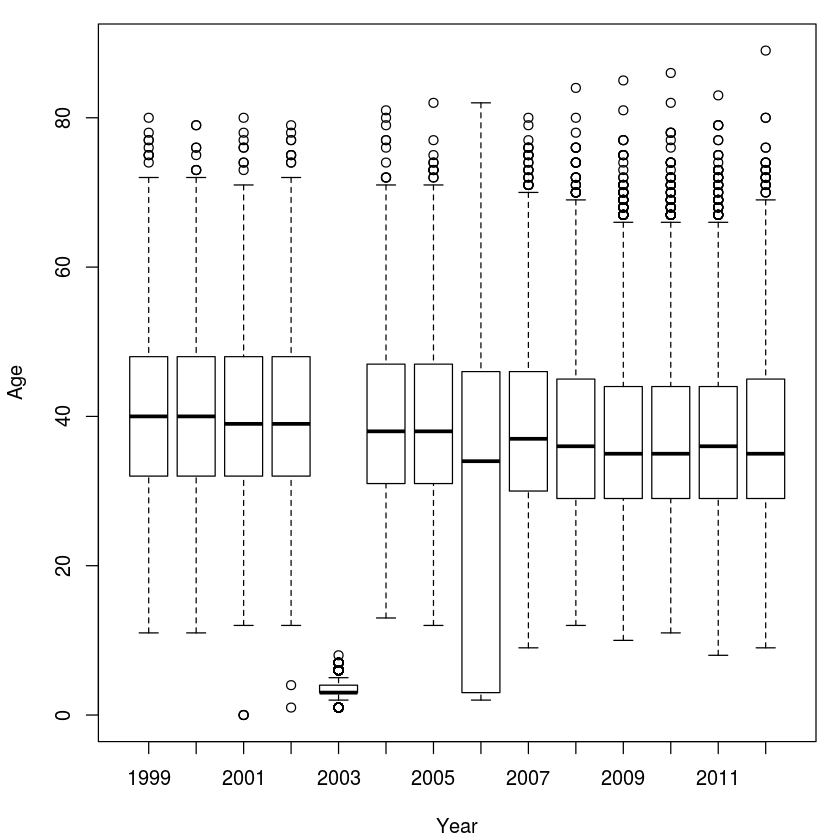

In [15]:
#pdf("CB_BoxplotAgeByYr.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

boxplot(age, ylab = "Age", xlab = "Year")

par(oldPar)
dev.off()

In [16]:
head(menFiles[['2003']])

menFiles[['2006']][2200:2205]

selectCols = function(shortColNames, headerRow, searchLocs) {
  sapply(shortColNames, function(shortName, headerRow, searchLocs){
    startPos = regexpr(shortName, headerRow)[[1]]
    if (startPos == -1) return( c(NA, NA) )
    index = sum(startPos >= searchLocs)
    c(searchLocs[index] + 1, searchLocs[index + 1])
  }, headerRow = headerRow, searchLocs = searchLocs )
}

menResMat = lapply(menFiles, extractVariables)
#womenResMat = lapply(womenFiles, extractVariables)

age = sapply(menResMat, 
             function(x) as.numeric(x[ , 'ag']))



[1] ""                                                                                             
[2] "Place Div /Tot  Num    Name                          Ag Hometown            Gun Tim  Net Tim "
[3] "===== ========= ===== ============================= == =================== =======  ======= " 
[4] "    1    1/1999     6  John Korir                    27  KEN                  46:56#   46:55 "
[5] "    2    2/1999     1  Reuben Cheruiyot              28  KEN                  47:03#   47:02 "
[6] "    3    3/1999     8  Gilbert Okari                 24  KEN                  47:07#   47:07 "

[1] " 2192 1263/2892   1475 Matt Curtis            39 Vienna          1:27:08 1:27:40   8:46   "
[2] " 2193  94/279    1437 Joe McCloskey          59 Columbia        1:27:01 1:27:40   8:46   " 
[3] " 2194 257/590    7062 Donald Hofmann         48 Princeton Junct 1:25:45 1:27:41   8:47   " 
[4] " 2195 1264/2892   7049 Claudio Petruzziello   23 Princeton Jct   1:25:45 1:27:41   8:47   "
[5] " 2196 339/746    3319 Robert Morrison        40 South Boston    1:23:54 1:27:41   8:47   " 
[6] " 2197 1265/2892   9345 Larry Cooper           32 Arlington       1:26:42 1:27:41   8:47   "

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”

null device 
          1

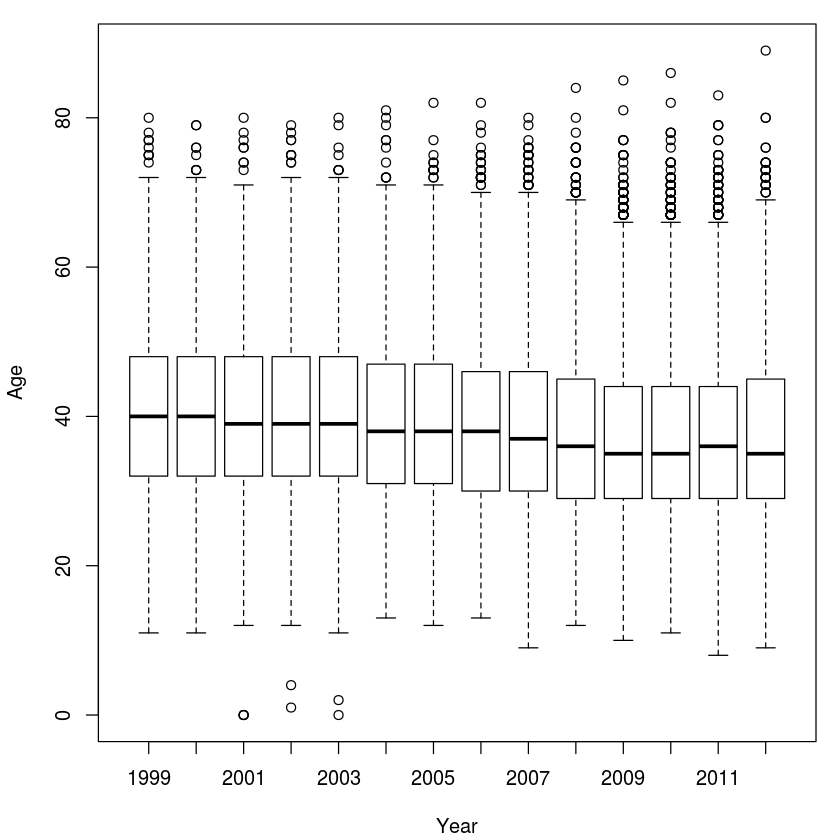

In [17]:
#pdf("CB_BoxplotAgeByYrRevised.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
boxplot(age, ylab = "Age", xlab = "Year")
par(oldPar)
dev.off()

In [18]:
sapply(age,  function(x) sum(is.na(x)))

age2001 = age[["2001"]]

grep("^===", menFiles[['2001']])

badAgeIndex = which(is.na(age2001)) + 5
menFiles[['2001']][ badAgeIndex ]
 
badAgeIndex

extractVariables = 
function(file, varNames =c("name", "home", "ag", "gun",
                           "net", "time"))
{
  
  # Find the index of the row with =s
  eqIndex = grep("^===", file)
  # Extract the two key rows and the data 
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
       # Remove footnotes and blank rows
  footnotes = grep("^[[:blank:]]*(\\*|\\#)", body)
  if ( length(footnotes) > 0 ) body = body[ -footnotes ]
  blanks = grep("^[[:blank:]]*$", body)
  if (length(blanks) > 0 ) body = body[ -blanks ]
  
  
  # Obtain the starting and ending positions of variables   
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)
  
  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  return(Values)
}

menResMat = lapply(menFiles, extractVariables)
#womenResMat = lapply(womenFiles, extractVariables)

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   1    1   61    3    2    0   13    2    5    0    4    6    0    1

[1] 5

[1] "             "                                                    
 [2] "                              "                                   
 [3] "                      "                                           
 [4] ""                                                                 
 [5] "                         "                                        
 [6] ""                                                                 
 [7] ""                                                                 
 [8] ""                                                                 
 [9] "             "                                                    
[10] "                              "                                   
[11] "                      "                                           
[12] ""                                                                 
[13] "                         "                                        
[14] ""                                                                 
[15] ""                                                                 
[16] ""                                                                 
[17] "             "                                                    
[18] "                              "                                   
[19] "                      "                                           
[20] ""                                                                 
[21] "                         "                                        
[22] ""                                                                 
[23] ""                                                                 
[24] ""                                                                 
[25] ""                                                                 
[26] "    "                                                             
[27] "         "                                                        
[28] ""                                                                 
[29] "            "                                                     
[30] ""                                                                 
[31] ""                                                                 
[32] ""                                                                 
[33] ""                                                                 
[34] "             "                                                    
[35] "                              "                                   
[36] "                      "                                           
[37] ""                                                                 
[38] "                         "                                        
[39] ""                                                                 
[40] ""                                                                 
[41] ""                                                                 
[42] "             "                                                    
[43] "                              "                                   
[44] "                      "                                           
[45] ""                                                                 
[46] "                         "                                        
[47] ""                                                                 
[48] ""                                                                 
[49] ""                                                                 
[50] ""                                                                 
[51] ""                                                                 
[52] ""                                                                 
[53] "             "                                                    
[54] "                              "                                   
[55] "                      "                              

[1] 1756 1757 1758 1759 1760 1761 1762 1763 1814 1815 1816 1817 1818 1819 1820
[16] 1821 1872 1873 1874 1875 1876 1877 1878 1879 1930 1931 1932 1933 1934 1935
[31] 1936 1937 2538 2539 2540 2541 2542 2543 2544 2545 2546 2897 2898 2899 2900
[46] 2901 2902 2903 2904 2955 2956 2957 3008 3009 3010 3011 3012 3013 3014 3015
[61] 3627

In [19]:
which(age2001 < 5)

menFiles[['2001']][ which(age2001 < 5) + 5 ]

charTime = menResMat[['2012']][, 'time']
head(charTime, 5)

tail(charTime, 5)

timePieces = strsplit(charTime, ":")

timePieces[[1]]

tail(timePieces, 1)

timePieces = sapply(timePieces, as.numeric)

runTime = sapply(timePieces, 
                 function(x) {
                   if (length(x) == 2) x[1] + x[2]/60
                   else 60*x[1] + x[2] + x[3]/60
                 })

summary(runTime)

convertTime = function(time) {
  timePieces = strsplit(time, ":")
  timePieces = sapply(timePieces, as.numeric)
  sapply(timePieces, function(x) {
                      if (length(x) == 2) x[1] + x[2]/60
                      else 60*x[1] + x[2] + x[3]/60
                      })
}

[1] 1377 3063 3112

[1] " 1377  5629 Steve PINKOS           0 Washington DC      1:20:07 1:22:34"
[2] " 3003  5033 Jeff LAKE              0 Clarksville MD     1:39:26 1:41:22"
[3] " 3052  5637 Greg RHODE             0 Washington DC      1:37:14 1:42:13"

[1] "  45:15 " "  46:28 " "  47:33 " "  47:34 " "  47:40 "

[1] "2:27:11 " "2:27:20 " "2:27:30 " "2:28:58 " "2:30:59 "

[1] "  45" "15 "

[[1]]
[1] "2"   "30"  "59 "

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.25   77.57   87.47   88.43   97.78  150.98 

In [20]:
createDF = 
function(Res, year, sex) 
{
       # Determine which time to use
  useTime = if( !is.na(Res[1, 'net']) )  
              Res[ , 'net']
            else if( !is.na(Res[1, 'gun']) ) 
               Res[ , 'gun']
            else 
               Res[ , 'time']

  runTime = convertTime(useTime)
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'],
                       home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

warnings()[ c(1:2, 49:50) ]

sapply(menDF, function(x) sum(is.na(x$runTime)))

createDF = function(Res, year, sex) 
{
  # Determine which time to use
  if ( !is.na(Res[1, 'net']) ) useTime = Res[ , 'net']
  else if ( !is.na(Res[1, 'gun']) ) useTime = Res[ , 'gun']
  else useTime = Res[ , 'time']
  
  # Remove # and * and blanks from time
  useTime = gsub("[#\\*[:blank:]]", "", useTime)
  runTime = convertTime(useTime[ useTime != "" ])
  
  # Drop rows with no time
  Res = Res[ useTime != "", ]
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'], home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}



Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduce

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

NULL

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0 5232   83    0 6649   68    0    0

Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduce

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in data.frame(year =

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0 5232    0    0 6646    0    0    0

Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduce

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”Warning message in lapply(X = X, FUN

null device 
          1

[1] 70070     6

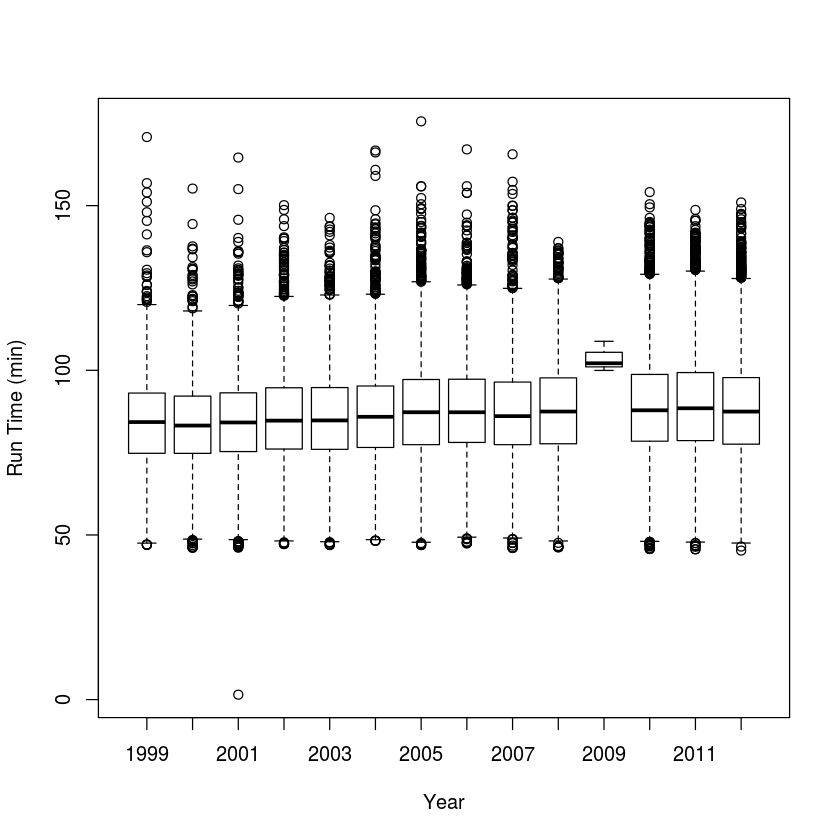

In [21]:
menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

sapply(menDF, function(x) sum(is.na(x$runTime)))

separatorIdx = grep("^===", menFiles[["2006"]])
separatorRow = menFiles[['2006']][separatorIdx]
separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
                      substring(separatorRow, 65, nchar(separatorRow)), 
                      sep = "")
menFiles[['2006']][separatorIdx] = separatorRowX

menResMat = sapply(menFiles, extractVariables)
menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

#separatorIdx = grep("^===", womenFiles[["2006"]])
#separatorRow = womenFiles[['2006']][separatorIdx]
#separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
#                      substring(separatorRow, 65, nchar(separatorRow)), 
#                      sep = "")
#womenFiles[['2006']][separatorIdx] = separatorRowX

#womenResMat = sapply(womenFiles, extractVariables)
#womenDF = mapply(createDF, womenResMat, year = 1999:2012,
#               sex = rep("W", 14), SIMPLIFY = FALSE)

#pdf("CB_BoxplotTimeByYr.pdf", width = 8, height = 5)
boxplot(sapply(menDF, function(x) x$runTime), 
        xlab = "Year", ylab = "Run Time (min)")
dev.off()

cbMen = do.call(rbind, menDF)
save(cbMen, file = "cbMen.rda")

dim(cbMen)

null device 
          1

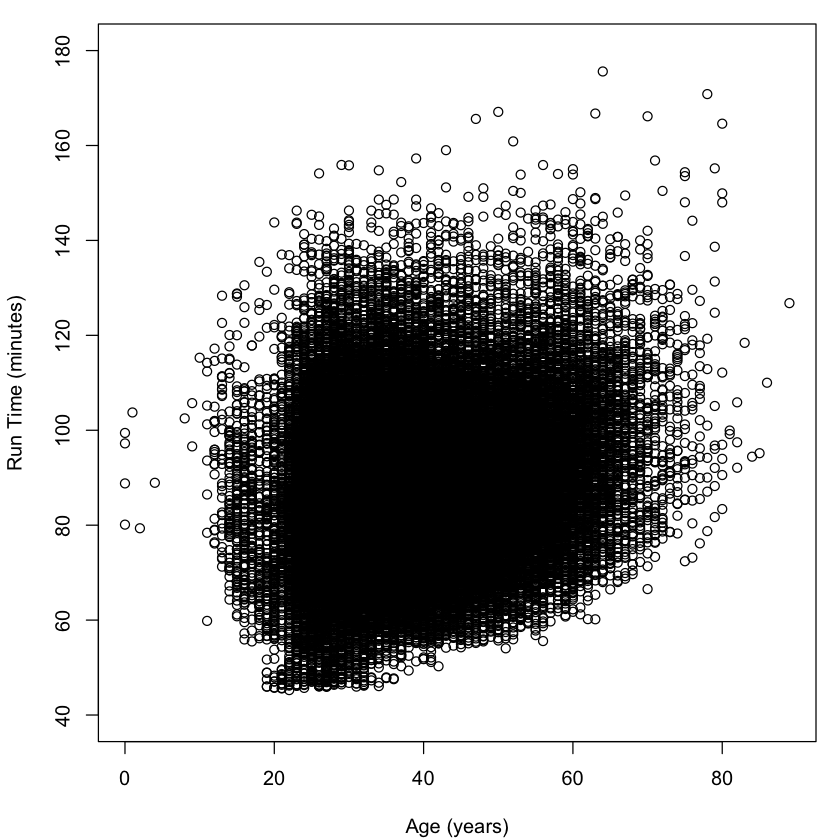

In [28]:
load("cbMen.rda")

#pdf("CB_Overplot.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(runTime ~ age, data = cbMen, ylim = c(40, 180),
     xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
dev.off()

[1] "brewer.pal"         "brewer.pal.info"    "display.brewer.all"
[4] "display.brewer.pal"

[1] "#54278F"

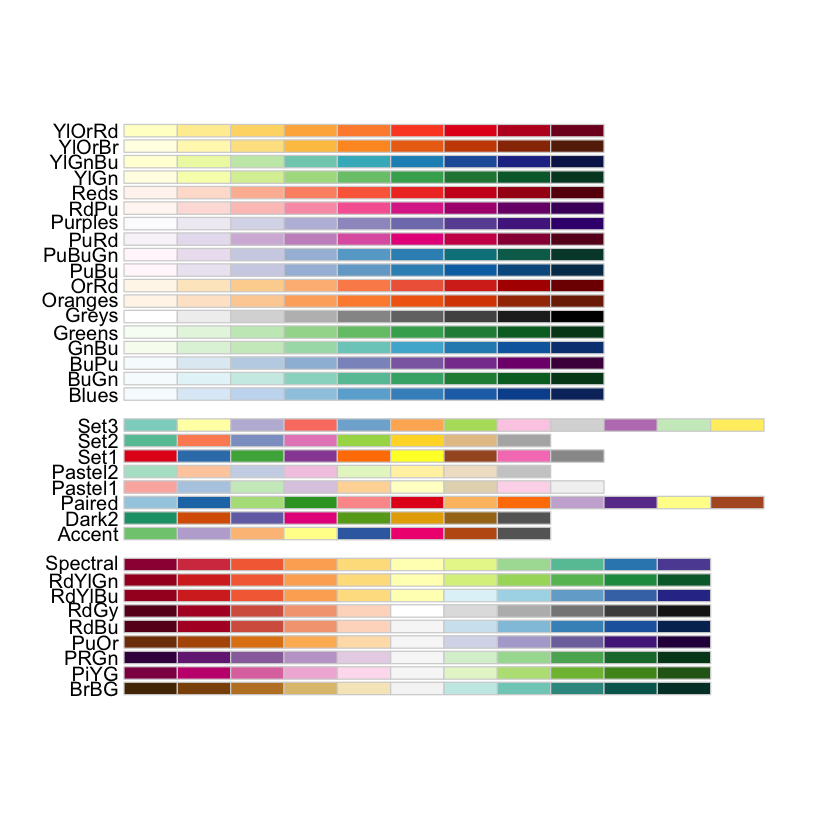

In [29]:
library(RColorBrewer)
ls("package:RColorBrewer")

display.brewer.all()

Purples8 = brewer.pal(9, "Purples")[8]
Purples8

Purples8A = paste(Purples8, "14", sep = "")



null device 
          1

null device 
          1

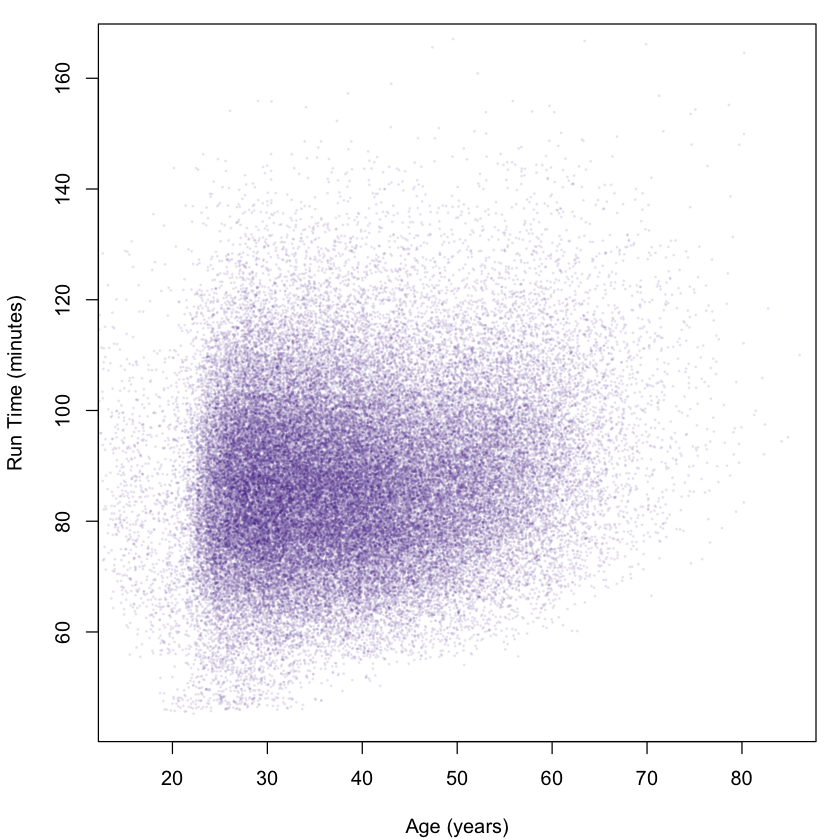

In [30]:
#pdf("CB_OverplotTransparent.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
plot(runTime ~ jitter(age, amount = 0.5), 
     data = cbMen, 
     pch = 19,cex = 0.2, col = Purples8A,
     ylim = c(45, 165), xlim = c(15, 85),
     xlab = "Age (years)", ylab = "Run Time (minutes)")
par(oldPar)
dev.off()

#pdf("CB_SmoothScatter.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(y = cbMen$runTime, x = cbMen$age,
              ylim = c(40, 165), xlim = c(15, 85),
              xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
dev.off()

ageCat
(15,25] (25,35] (35,45] (45,55] (55,65] (65,75] (75,90] 
   5804   25434   20535   12212    5001     751      69 

null device 
          1

(Intercept)         age 
 78.7567186   0.2252921


Call:
lm(formula = runTime ~ age, data = cbMenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.333 -10.220  -0.952   9.102  82.425 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 78.75672    0.20770  379.18   <2e-16 ***
age          0.22529    0.00517   43.58   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.77 on 69804 degrees of freedom
Multiple R-squared:  0.02649,	Adjusted R-squared:  0.02647 
F-statistic:  1899 on 1 and 69804 DF,  p-value: < 2.2e-16


[1] "lm"

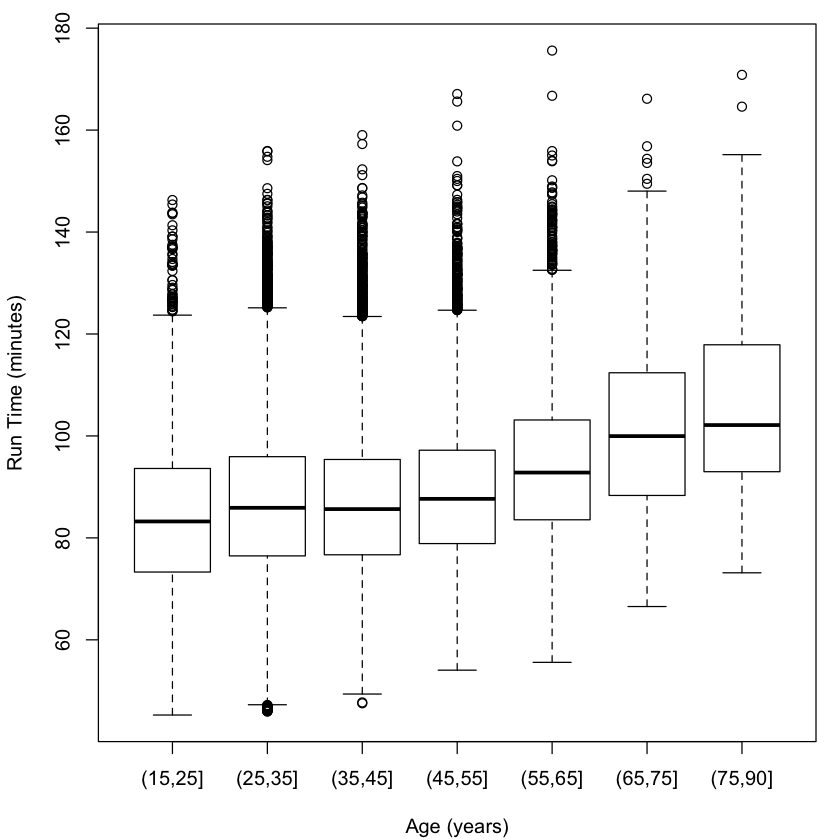

In [31]:
cbMenSub = cbMen[cbMen$runTime > 30 &
                 !is.na(cbMen$age) & cbMen$age > 15, ]

ageCat = cut(cbMenSub$age, breaks = c(seq(15, 75, 10), 90))
table(ageCat)

#pdf("CB_Boxplots.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(cbMenSub$runTime ~ ageCat, 
     xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
dev.off()

lmAge = lm(runTime ~ age, data = cbMenSub)

lmAge$coefficients

summary(lmAge)

class(lmAge)



null device 
          1

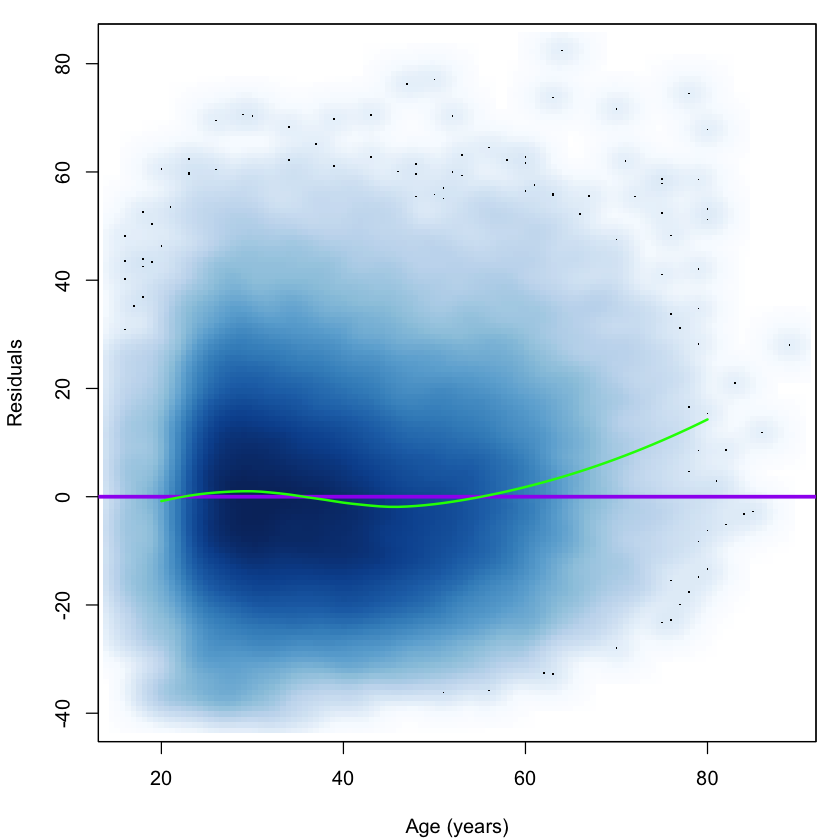

In [32]:
#pdf("CB_ResidSimpleLM.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(x = cbMenSub$age, y = lmAge$residuals,
              xlab = "Age (years)", ylab = "Residuals")
abline(h = 0, col = "purple", lwd = 3)
 
resid.lo = loess(resids ~ age, 
                 data = data.frame(resids = residuals(lmAge),
                                   age = cbMenSub$age))

age20to80 = 20:80

resid.lo.pr = 
  predict(resid.lo, newdata = data.frame(age = age20to80))

lines(x = age20to80, y = resid.lo.pr, col = "green", lwd = 2)
par(oldPar)
dev.off()

In [33]:
menRes.lo = loess(runTime ~ age, cbMenSub)

menRes.lo.pr = predict(menRes.lo, data.frame(age = age20to80))

over50 = pmax(0, cbMenSub$age - 50)

lmOver50 = lm(runTime ~ age + over50, data = cbMenSub)

summary(lmOver50)

decades = seq(30, 60, by = 10)
overAge = lapply(decades, 
                 function(x) pmax(0, (cbMenSub$age - x)))
names(overAge) = paste("over", decades, sep = "")
overAge = as.data.frame(overAge)
tail(overAge)

lmPiecewise = lm(runTime ~ . , 
                 data = cbind(cbMenSub[, c("runTime", "age")], 
                              overAge))

summary(lmPiecewise)

overAge20 = lapply(decades, function(x) pmax(0, (age20to80 - x)))
names(overAge20) = paste("over", decades, sep = "")
overAgeDF = cbind(age = data.frame(age = age20to80), overAge20)

tail(overAgeDF)

predPiecewise = predict(lmPiecewise, overAgeDF)
                   



Call:
lm(formula = runTime ~ age + over50, data = cbMenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.265 -10.098  -0.881   9.060  79.044 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 82.754891   0.265039  312.24   <2e-16 ***
age          0.105693   0.007147   14.79   <2e-16 ***
over50       0.563871   0.023371   24.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.71 on 69803 degrees of freedom
Multiple R-squared:  0.03454,	Adjusted R-squared:  0.03451 
F-statistic:  1248 on 2 and 69803 DF,  p-value: < 2.2e-16


over30 over40 over50 over60
69801 36     26     16     6     
69802 11      1      0     0     
69803  9      0      0     0     
69804 26     16      6     0     
69805  5      0      0     0     
69806 18      8      0     0


Call:
lm(formula = runTime ~ ., data = cbind(cbMenSub[, c("runTime", 
    "age")], overAge))

Residuals:
    Min      1Q  Median      3Q     Max 
-40.921 -10.119  -0.885   9.023  78.965 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 74.228626   0.915248  81.102  < 2e-16 ***
age          0.424285   0.033207  12.777  < 2e-16 ***
over30      -0.477010   0.047778  -9.984  < 2e-16 ***
over40       0.221574   0.040666   5.449 5.09e-08 ***
over50       0.494432   0.052932   9.341  < 2e-16 ***
over60      -0.003601   0.077654  -0.046    0.963    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.7 on 69800 degrees of freedom
Multiple R-squared:  0.03593,	Adjusted R-squared:  0.03586 
F-statistic: 520.3 on 5 and 69800 DF,  p-value: < 2.2e-16


age over30 over40 over50 over60
56 75  45     35     25     15    
57 76  46     36     26     16    
58 77  47     37     27     17    
59 78  48     38     28     18    
60 79  49     39     29     19    
61 80  50     40     30     20

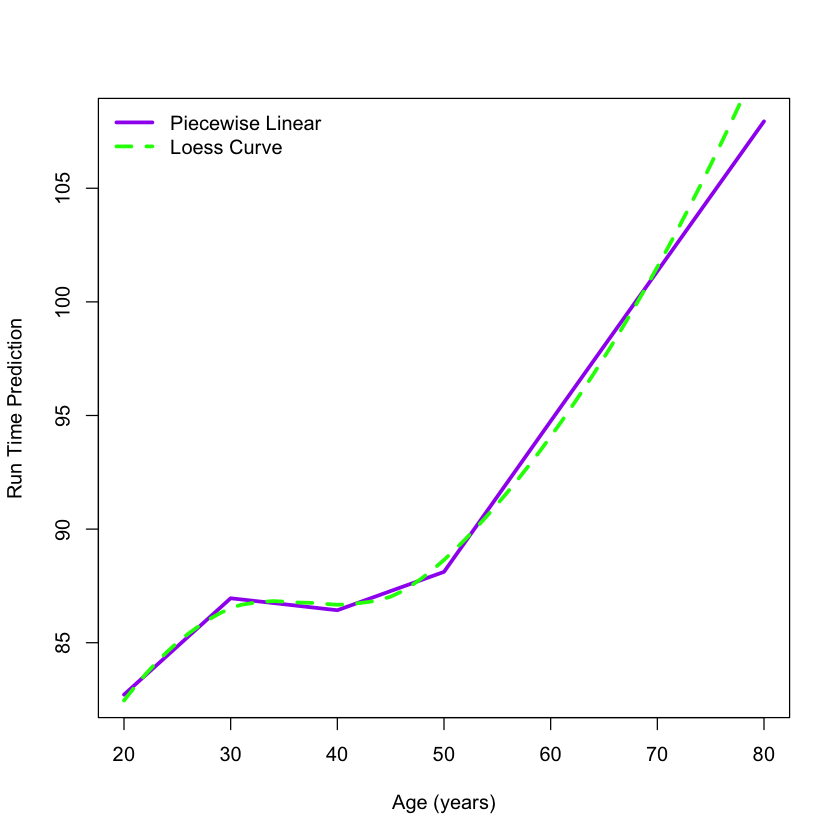

null device 
          1

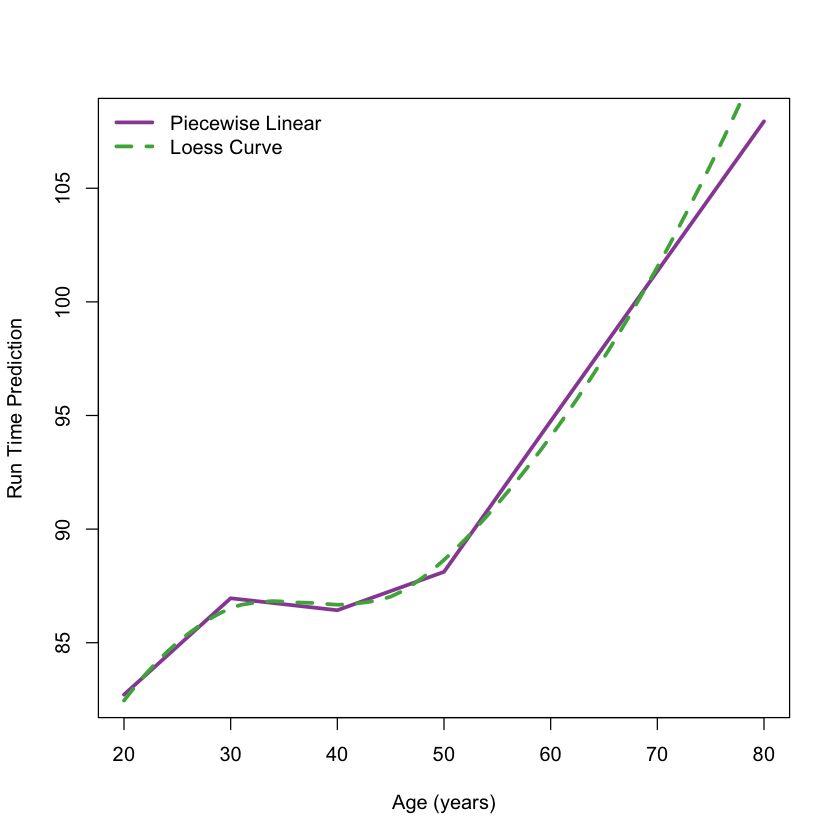

In [34]:
plot(predPiecewise ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Run Time Prediction")

lines(x = age20to80, y = menRes.lo.pr, 
      col = "green", lty = 2, lwd = 3)
legend("topleft", col = c("purple", "green"),
       lty = c(1, 2), lwd= 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")

#pdf("CB_PiecewiseLoessCurves.pdf", width = 8, height = 6)
plot(predPiecewise ~ age20to80,
     type = "l", col = "#984ea3", lwd = 3,
  #   type = "l", col = "purple", lwd = 2,
     xlab = "Age (years)", ylab = "Run Time Prediction")

lines(x = age20to80, y = menRes.lo.pr, col = "#4daf4a", lwd = 3, lty = 2)
legend("topleft", col = c("#984ea3", "#4daf4a"), lty = c(1, 2), lwd = 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")

#lines(x = age20to80, y = menRes.lo.pr, col = "green", lwd = 2)
#legend("topleft", col = c("purple", "green"), lty = 1, lwd = 2,
#       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")
dev.off()

null device 
          1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  46.98   74.82   84.29   84.35   93.06  170.83 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.25   77.57   87.47   88.44   97.78  150.98 

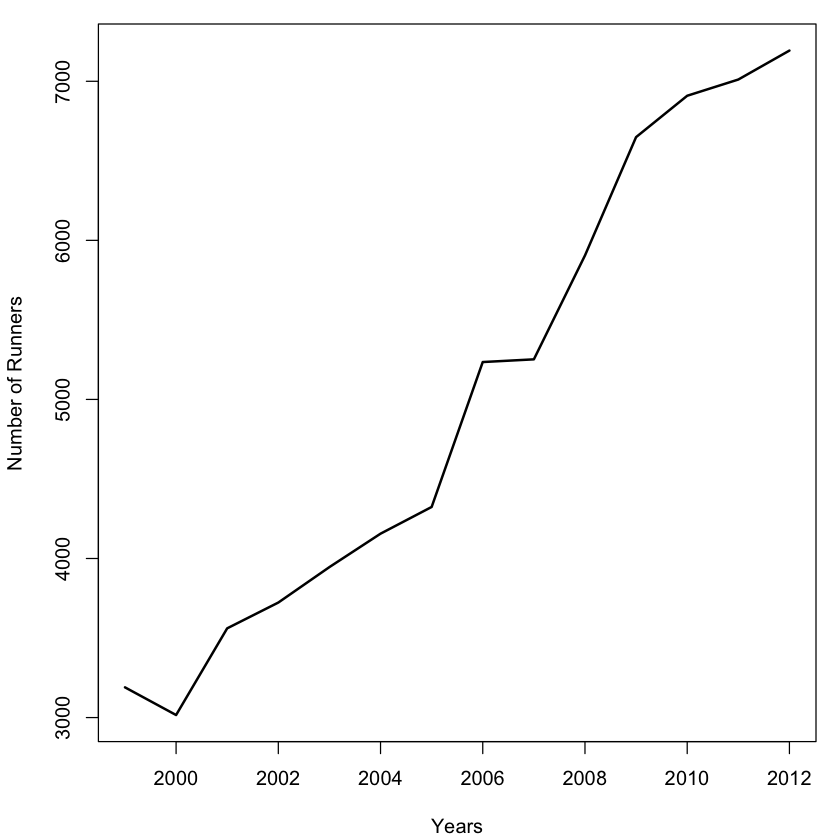

In [35]:
#pdf("CB_NumRunnersLinePlot.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

numRunners = with(cbMen, tapply(runTime, year, length))
plot(numRunners ~ names(numRunners), type="l", lwd = 2,
     xlab = "Years", ylab = "Number of Runners")
par(oldPar)
dev.off()

summary(cbMenSub$runTime[cbMenSub$year == 1999])

summary(cbMenSub$runTime[cbMenSub$year == 2012])

null device 
          1

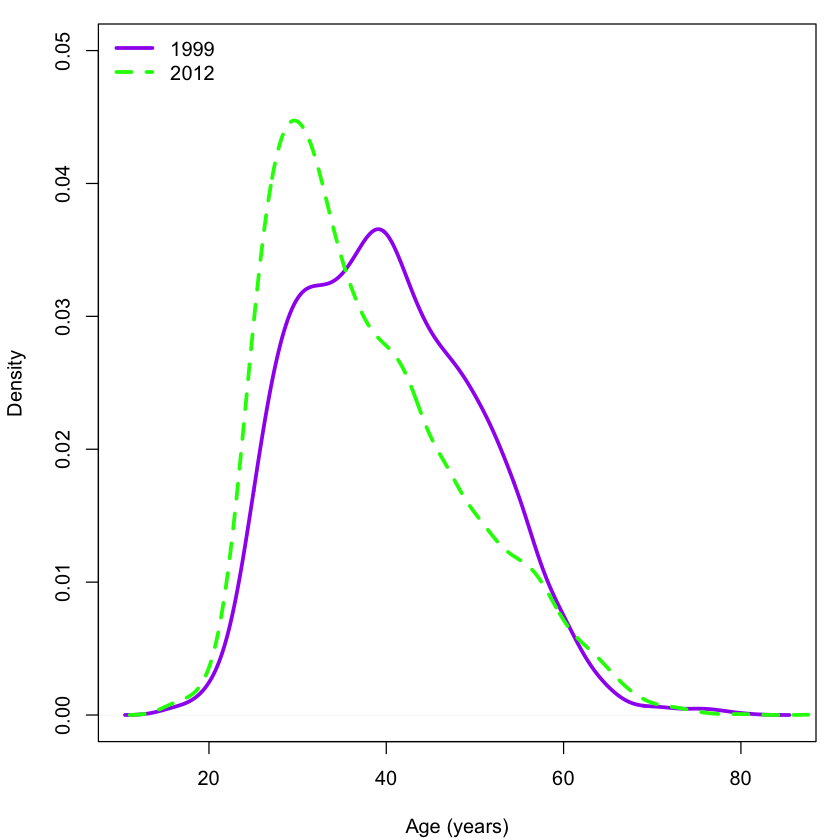

In [36]:
#pdf("CB_AgeDensity99vs12.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

age1999 = cbMenSub[ cbMenSub$year == 1999, "age" ]
age2012 = cbMenSub[ cbMenSub$year == 2012, "age" ]

plot(density(age1999, na.rm = TRUE), 
     ylim = c(0, 0.05), col = "purple",
     lwd = 3,  xlab = "Age (years)",  main = "")
lines(density(age2012, na.rm = TRUE), 
      lwd = 3, lty = 2, col="green")
legend("topleft", col = c("purple", "green"), lty= 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

par(oldPar)
dev.off()

qqplot(age1999, age2012, pch = 19, cex = 0.5, 
       ylim = c(10,90), xlim = c(10,90), 
       xlab = "Age in 1999 Race",
       ylab = "Age in 2012 Race", 
       main = "Quantile-quantile plot of male runner's age")
abline(a =0, b = 1, col="red", lwd = 2)

mR.lo99 = loess(runTime ~ age, cbMenSub[ cbMenSub$year == 1999,])
mR.lo.pr99 = predict(mR.lo99, data.frame(age = age20to80))

mR.lo12 = loess(runTime ~ age, cbMenSub[ cbMenSub$year == 2012,])
mR.lo.pr12 = predict(mR.lo12, data.frame(age = age20to80))

plot(mR.lo.pr99 ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Fitted Run Time (minutes)")
   
lines(x = age20to80, y = mR.lo.pr12,
      col = "green", lty = 2, lwd = 3)
 
legend("topleft", col = c("purple", "green"), lty = 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")



null device 
          1

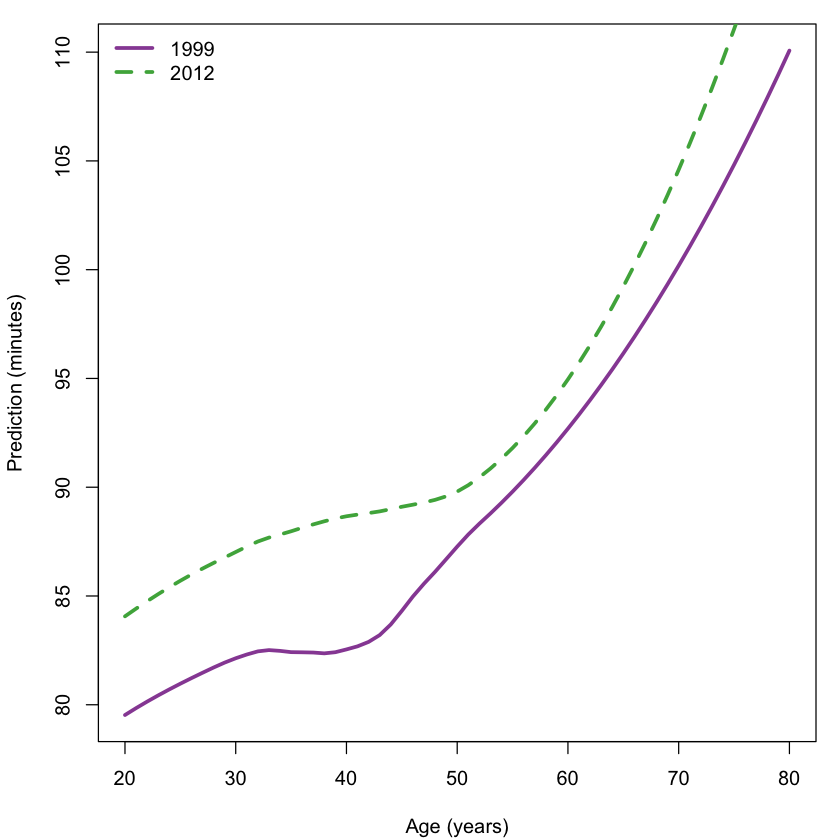

In [37]:
#pdf("CB_Loess99vs12.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(mR.lo.pr99 ~ age20to80,
     type = "l", col = "#984ea3", lwd = 3,
     xlab = "Age (years)", ylab = "Prediction (minutes)")  
lines(x = age20to80, y = mR.lo.pr12, col="#4daf4a", lty = 2, lwd = 3) 
legend("topleft", col = c("#984ea3", "#4daf4a"), lty = 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")
par(oldPar)
dev.off()

gap14 = mR.lo.pr12 - mR.lo.pr99



null device 
          1

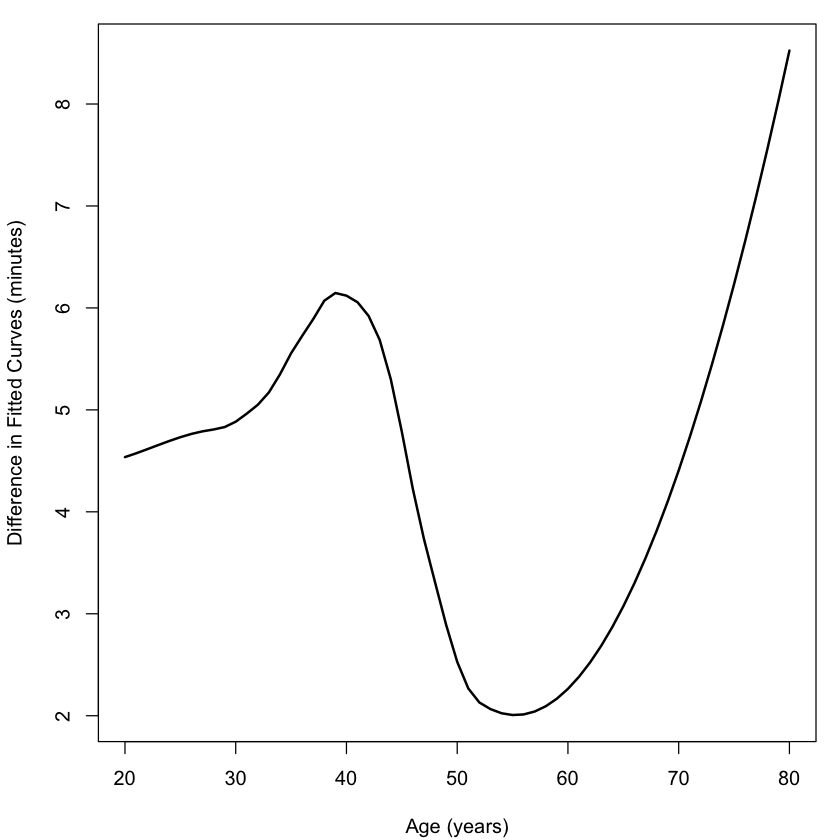

In [38]:
#pdf("CB_DifferenceInFittedCurves.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(gap14 ~ age20to80, type = "l" , xlab = "Age (years)", 
     ylab = "Difference in Fitted Curves (minutes)", lwd = 2)
par(oldPar)
dev.off()




In [39]:
trimBlanks = function(charVector) {
  nameClean = gsub("^[[:blank:]]+", "", charVector)
  nameClean = gsub("[[:blank:]]+$", "", nameClean)
  nameClean = gsub("[[:blank:]]+", " ", nameClean)
}

nameClean = trimBlanks(cbMenSub$name)

length(nameClean)

length(unique(nameClean))

table(table(nameClean))

head( sort(table(nameClean), decreasing = TRUE), 1)

[1] 69806

[1] 42884


    1     2     3     4     5     6     7     8     9    10    11    12    13 
29293  7716  2736  1386   712   417   249   149    92    56    44    19     7 
   14    15    17    18    19    30 
    3     1     1     1     1     1 

Michael Smith 
           30

In [40]:
mSmith = cbMenSub[nameClean == "Michael Smith", ]

head(unique(mSmith$home))

nameClean = tolower(nameClean)

head( sort(table(nameClean), decreasing = TRUE), 1)

nameClean = gsub("[,.]", "", nameClean)

tabNameYr = table(cbMenSub$year, nameClean)

max(tabNameYr)

class(tabNameYr)

mode(tabNameYr)

names(attributes(tabNameYr))

dim(tabNameYr)

head(colnames(tabNameYr), 3)

which( tabNameYr == max(tabNameYr) )

which( tabNameYr == max(tabNameYr), arr.ind = TRUE )

indMax = which( tabNameYr == max(tabNameYr), arr.ind = TRUE )
colnames(tabNameYr)[indMax[2]]

cbMenSub$nameClean = nameClean

cbMenSub$yob = cbMenSub$year - cbMenSub$age



[1] "Annapolis MD       "  "Bethesda MD        "  " Annapolis MD       "
[4] " Chevy Chase MD     " " Annandale VA       " "Annapolis MD        "

michael smith 
           33

[1] 5

[1] "table"

[1] "numeric"

[1] "dim"      "dimnames" "class"

[1]    14 39135

[1] "8illiam maury"   "a gudu memon"    "a miles simmons"

[1] 356482

nameClean
2012 14 25463

[1] "michael brown"

In [41]:
# Fix home in a similar way
homeClean = trimBlanks(tolower(cbMenSub$home))
cbMenSub$homeClean = gsub("[,.]", "", homeClean)

vars = c("year", "homeClean", "nameClean", "yob",  "runTime")
mb = which(nameClean == "michael brown")
birthOrder = order(cbMenSub$yob[mb])
cbMenSub[mb[birthOrder], vars]

cbMenSub$ID = paste(nameClean, cbMenSub$yob, sep = "_")

races = tapply(cbMenSub$year, cbMenSub$ID, length)

races8 = names(races)[which(races >= 8)]

men8 = cbMenSub[ cbMenSub$ID %in% races8, ]

orderByRunner = order(men8$ID, men8$year)
men8 = men8[orderByRunner, ]

men8L = split(men8, men8$ID)
names(men8L) = races8

length(unique(men8$ID))

gapTime = tapply(men8$runTime, men8$ID,
                 function(t) any(abs(diff(t)) > 20))

gapTime = sapply(men8L, function(df) 
                          any(abs(diff(df$runTime)) > 20))

sum(gapTime)

lapply(men8L[ gapTime ][1:2], function(df) df[, vars])

homeLen = nchar(cbMenSub$homeClean)

cbMenSub$state = substr(cbMenSub$homeClean, 
                        start = homeLen - 1, stop = homeLen)

cbMenSub$state[cbMenSub$year == 2006] = NA

cbMenSub$ID = paste(cbMenSub$nameClean, cbMenSub$yob, 
                    cbMenSub$state, sep = "_")

numRaces = tapply(cbMenSub$year, cbMenSub$ID, length)
races8 = names(numRaces)[which(numRaces >= 8)]
men8 = cbMenSub[ cbMenSub$ID %in% races8, ]
orderByRunner = order(men8$ID, men8$year)
men8 = men8[orderByRunner, ]

men8L = split(men8, men8$ID)
names(men8L) = races8

length(races8)



year homeClean      nameClean     yob  runTime  
2000.2526 2000 tucson az      michael brown 1939  96.88333
2010.4241 2010 north east md  michael brown 1953  92.26667
2011.3026 2011 north east md  michael brown 1953  85.95000
2012.3800 2012 north east md  michael brown 1953  88.43333
2009.5246 2009 oakton va      michael brown 1957  99.73333
2008.3896 2008 ashburn va     michael brown 1958  93.73333
2009.3509 2009 ashburn va     michael brown 1958  88.56667
2010.5309 2010 ashburn va     michael brown 1958  99.75000
2012.4078 2012 reston va      michael brown 1958  89.95000
2006.2631 2006 chevy chase    michael brown 1966  84.56667
2010.1907 2010 chevy chase md michael brown 1966  79.35000
2012.5089 2012 chevy chase md michael brown 1966  95.81667
2004.998  2004 berryville va  michael brown 1978  76.31667
2008.2501 2008 arlington va   michael brown 1984  84.68333
2010.6307 2010 new york ny    michael brown 1984 110.88333
2011.2274 2011 arlington va   michael brown 1984  81.70000
2012.881  2012 arlington va   michael brown 1984  70.93333
2012.3084 2012 clifton va     michael brown 1988  84.88333

[1] 480

[1] 49

$`abiy zewde_1967`
          year            homeClean  nameClean  yob   runTime
1999.2640 1999      gaithersburg md abiy zewde 1967  96.51667
2000.2616 2000   montgomery vill md abiy zewde 1967  96.63333
2001.2276 2001   montgomery vill md abiy zewde 1967  89.10000
2002.3684 2002   montgomery vill md abiy zewde 1967 123.00000
2003.3301 2003      gaithersburg md abiy zewde 1967  97.68333
2004.3579 2004   montgomery vill md abiy zewde 1967 100.36667
2006.4839 2006         gaithersburg abiy zewde 1967 108.40000
2008.4562 2008   montgomery vill md abiy zewde 1967  98.78333
2009.5072 2009 montgomery villag md abiy zewde 1967  98.50000
2010.5330 2010 montgomery villag md abiy zewde 1967  99.91667
2011.6493 2011 montgomery villag md abiy zewde 1967 113.10000
2012.3085 2012 montgomery villag md abiy zewde 1967  84.88333

$`adam hughes_1978`
          year     homeClean   nameClean  yob   runTime
2005.1916 2005 washington dc adam hughes 1978  80.38333
2006.2279 2006    washington adam hughes 1978  85.16667
2007.1367 2007 washington dc adam hughes 1978  77.78333
2008.1028 2008 washington dc adam hughes 1978  74.23333
2009.5980 2009 washington dc adam hughes 1978 108.06667
2010.5641 2010 washington dc adam hughes 1978 103.06667
2011.1484 2011 washington dc adam hughes 1978  77.11667
2012.1836 2012 washington dc adam hughes 1978  77.76667

[1] 306

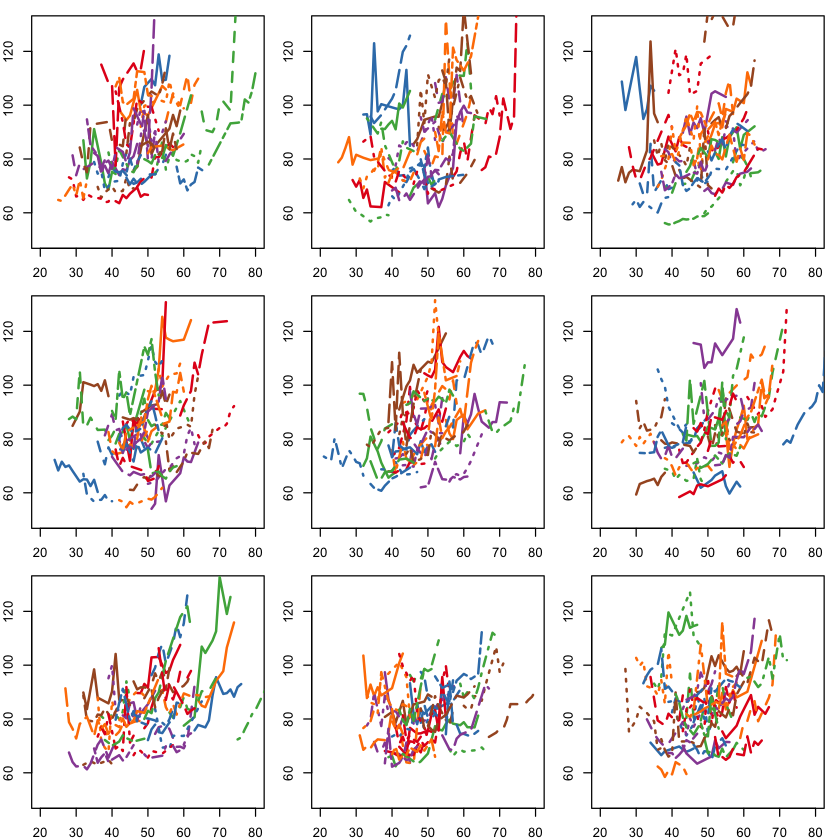

In [42]:
groups = 1 + (1:length(men8L) %% 9)

addRunners = function(listRunners, colors, numLty) 
{
  numRunners = length(listRunners)
  colIndx = 1 + (1:numRunners) %% length(colors)
  ltys = rep(1:numLty, each = length(colors), length = numRunners)

  mapply(function(df, i) {      
           lines(df$runTime ~ df$age, 
           col = colors[colIndx[i]], lwd = 2, lty = ltys[i])
         }, listRunners, i = 1:numRunners) 
}

colors = c("#e41a1c", "#377eb8","#4daf4a", "#984ea3", 
           "#ff7f00", "#a65628")
par(mfrow = c(3, 3), mar = c(2, 2, 1, 1))
invisible(
  sapply(1:9, function(grpId){
    plot( x = 0, y = 0, type = "n",
          xlim = c(20, 80), ylim = c(50, 130),
          xlab = "Age (years)", ylab = "Run Time (minutes)")
     
    addRunners(men8L[ groups == grpId ], colors, numLty = 6)
  }) )

fitOne = function(oneRunner, addLine = FALSE, col = "grey") {
  lmOne = lm(runTime ~ age, data = oneRunner)
  if (addLine) 
    lines(x = oneRunner$age, y = predict(lmOne), 
          col = col, lwd = 2, lty = 2)

  ind = floor( (nrow(oneRunner) + 1) / 2)
  res = c(coefficients(lmOne)[2], oneRunner$age[ind],
          predict(lmOne)[ind])
  names(res) = c("ageCoeff", "medAge", "predRunTime")
  return(res)
}

ERROR while rich displaying an object: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[1]]) result is length 0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\

$`allen greenberg_1966_dc`
NULL

$`barry goldmeier_1965_md`
NULL

$`brian carroll_1956_md`
NULL

$`charlie sole_1946_va`
NULL

$`curtis dalton_1952_md`
NULL

$`david gearin_1945_va`
NULL

$`desi alston_1953_va`
NULL

$`edward hagarty_1955_md`
NULL

$`erik fatemi_1966_va`
NULL

$`fred carson_1940_md`
NULL

$`gerald royce_1942_va`
NULL

$`hunter montgomery_1969_md`
NULL

$`james snee_1961_md`
NULL

$`jim o'donnell_1964_dc`
NULL

$`john sauer_1956_md`
NULL

$`jonathan agin_1972_va`
NULL

$`keith buell_1974_va`
NULL

$`kevin barrett_1959_ma`
NULL

$`len gemma_1960_md`
NULL

$`louis garczynski_1940_va`
NULL

$`mark fraley_1957_oh`
NULL

$`michael davitt_1954_md`
NULL

$`michael mcroberts_1963_va`
NULL

$`milton vazquez_1954_md`
NULL

$`omar ali_1971_md`
NULL

$`paul warren_1950_ny`
NULL

$`ralph mckinney_1945_de`
NULL

$`richard joseph_1964_ny`
NULL

$`robert platt_1952_va`
NULL

$`ronnie wong_1947_md`
NULL

$`stephen chavez_1953_md`
NULL

$`thomas engle_1959_va`
NULL

$`tracy wilson_1960_v

$`allen greenberg_1966_dc`
   ageCoeff      medAge predRunTime 
-0.06422567 42.00000000 68.62088587 

$`barry goldmeier_1965_md`
   ageCoeff      medAge predRunTime 
  0.6043803  43.0000000 113.6788462 

$`brian carroll_1956_md`
   ageCoeff      medAge predRunTime 
  0.2984209  51.0000000  69.1152850 

$`charlie sole_1946_va`
   ageCoeff      medAge predRunTime 
    1.74380    56.00000    87.81894 

$`curtis dalton_1952_md`
   ageCoeff      medAge predRunTime 
  0.7106573  53.0000000  97.3086737 

$`david gearin_1945_va`
   ageCoeff      medAge predRunTime 
  0.8283955  62.0000000  81.8074764 

$`desi alston_1953_va`
   ageCoeff      medAge predRunTime 
  0.3102904  50.0000000  68.6017677 

$`edward hagarty_1955_md`
   ageCoeff      medAge predRunTime 
 0.07279959 50.00000000 84.63434891 

$`erik fatemi_1966_va`
   ageCoeff      medAge predRunTime 
  0.1793474  37.0000000  74.1732342 

$`fred carson_1940_md`
   ageCoeff      medAge predRunTime 
   2.748825   63.000000   84.210043 

$`gerald royce_1942_va`
   ageCoeff      medAge predRunTime 
     1.9102     62.0000    100.1906 

$`hunter montgomery_1969_md`
   ageCoeff      medAge predRunTime 
 -0.6917469  39.0000000  82.8802184 

$`james snee_1961_md`
   ageCoeff      medAge predRunTime 
 -0.3151655  46.0000000  81.3345616 

$`jim o'donnell_1964_dc`
   ageCoeff      medAge predRunTime 
   1.628891   38.000000  101.717910 

$`john sauer_1956_md`
   ageCoeff      medAge predRunTime 
   1.037477   48.000000   81.073766 

$`jonathan agin_1972_va`
   ageCoeff      medAge predRunTime 
 -0.7079431  35.0000000  95.4824610 

$`keith buell_1974_va`
   ageCoeff      medAge predRunTime 
  -1.836643   33.000000   78.038153 

$`kevin barrett_1959_ma`
   ageCoeff      medAge predRunTime 
  0.4906609  49.0000000  83.7143678 

$`len gemma_1960_md`
   ageCoeff      medAge predRunTime 
   0.737585   43.000000   86.526956 

$`louis garczynski_1940_va`
   ageCoeff      medAge predRunTime 
   1.051165   67.000000   99.192981 

$`mark fraley_1957_oh`
   ageCoeff      medAge predRunTime 
   1.201748   47.000000   90.286407 

$`michael davitt_1954_md`
   ageCoeff      medAge predRunTime 
  0.3352041  51.0000000  88.4843537 

$`michael mcroberts_1963_va`
   ageCoeff      medAge predRunTime 
  0.2701389  40.0000000  72.0236111 

$`milton vazquez_1954_md`
   ageCoeff      medAge predRunTime 
 0.09781651 53.00000000 86.13745994 

$`omar ali_1971_md`
   ageCoeff      medAge predRunTime 
 -0.4851026  36.0000000  96.0043878 

$`paul warren_1950_ny`
   ageCoeff      medAge predRunTime 
-0.01358711 53.00000000 68.39056173 

$`ralph mckinney_1945_de`
   ageCoeff      medAge predRunTime 
   3.162451   58.000000   94.960196 

$`richard joseph_1964_ny`
   ageCoeff      medAge predRunTime 
 0.01013514 39.00000000 60.99864865 

$`robert platt_1952_va`
   ageCoeff      medAge predRunTime 
   1.668127   52.000000   77.869373 

$`ronnie wong_1947_md`
   ageCoeff      medAge predRunTime 
  0.3051343  58.0000000  68.5476303 

$`stephen chavez_1953_md`
   ageCoeff      medAge predRunTime 
   1.228651   51.000000   86.551087 

$`thomas engle_1959_va`
   ageCoeff      medAge predRunTime 
 -0.4032051  46.0000000  80.0532051 

$`tracy wilson_1960_va`
   ageCoeff      medAge predRunTime 
    1.02548    42.00000    68.51324 

$`william furlong_1955_va`
   ageCoeff      medAge predRunTime 
   1.736293   49.000000   87.749356


Call:
lm(formula = coeffs ~ ages)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4026 -0.6375 -0.0246  0.5645  3.3541 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.958440   0.305487  -6.411 5.51e-10 ***
ages         0.055263   0.006175   8.949  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.01 on 304 degrees of freedom
Multiple R-squared:  0.2085,	Adjusted R-squared:  0.2059 
F-statistic: 80.09 on 1 and 304 DF,  p-value: < 2.2e-16


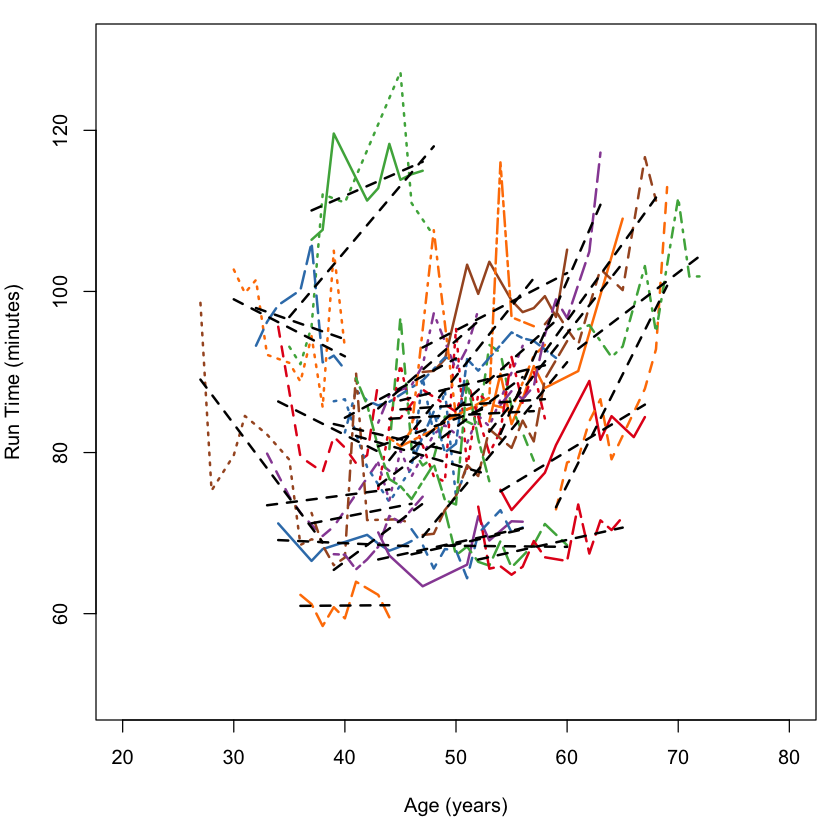

In [43]:
par(mfrow = c(1, 1), mar = c(5, 4, 1, 1))

plot( x = 0, y = 0, type = "n",
      xlim = c(20, 80), ylim = c(50, 130),
      xlab = "Age (years)", ylab = "Run Time (minutes)")
     
addRunners(men8L[ groups == 9 ], colors, numLty = 6)
lapply(men8L[groups == 9], fitOne, addLine = TRUE, col = "black")

men8LongFit = lapply(men8L, fitOne)

coeffs = sapply(men8LongFit, "[", "ageCoeff" )
ages = sapply(men8LongFit, "[", "medAge")

longCoeffs = lm(coeffs ~ ages)

summary(longCoeffs)

In [ ]:
#pdf("CB_LongCoeffs.pdf", width = 10, height = 7)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
plot(coeffs ~ ages, xlab = "Median Age (years)",
     ylab = "Coefficient (minutes per race / year)")
abline(longCoeffs, col = "#984ea3", lwd = 3)
abline(h = 0, col="blue", lwd = 3)
loCoeffs = loess(coeffs ~ ages)
ageV = min(ages):max(ages)
predV = predict(loCoeffs, new = data.frame(ages = ageV))
lines(x = ageV, y = predV, lwd = 3, lty = 2, col = "#4daf4a")
par(oldPar)
dev.off()

In [ ]:
par(mfrow = c(1, 1), mar = c(5, 4, 1, 1))

plot( x = 0, y = 0, type = "n",
      xlim = c(20, 80), ylim = c(50, 130),
      xlab = "Age (years)", ylab = "Run Time (minutes)")
     
addRunners(men8L[ groups == 9 ], colors, numLty = 6)
lapply(men8L[groups == 9], fitOne, addLine = TRUE, col = "black")

men8LongFit = lapply(men8L, fitOne)

coeffs = sapply(men8LongFit, "[", "ageCoeff" )
ages = sapply(men8LongFit, "[", "medAge")

longCoeffs = lm(coeffs ~ ages)

summary(longCoeffs)



In [ ]:
#pdf("CB_LongCoeffs.pdf", width = 10, height = 7)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
plot(coeffs ~ ages, xlab = "Median Age (years)",
     ylab = "Coefficient (minutes per race / year)")
abline(longCoeffs, col = "#984ea3", lwd = 3)
abline(h = 0, col="blue", lwd = 3)
loCoeffs = loess(coeffs ~ ages)
ageV = min(ages):max(ages)
predV = predict(loCoeffs, new = data.frame(ages = ageV))
lines(x = ageV, y = predV, lwd = 3, lty = 2, col = "#4daf4a")
par(oldPar)
dev.off()